# 선형회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# 데이터 준비
x = np.array([1,2,3,4,5]).reshape(-1,1)
y = np.array([50,55,65,70,75])

In [3]:
# 모델 학습
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [4]:
# 학습된 모델의 기울기와 절편 확인
m = model.coef_[0] # 기울기
b = model.intercept_ #절편
print(f'기울기 : ', m)
print(f'절편 : ', b)

기울기 :  6.500000000000001
절편 :  43.5


In [5]:
# 예측 값 계산
y_pred = model.predict(x) # 데이터 x에 대한 예측 값

In [6]:
# 성능 평가
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [7]:
print(f'mse : ', mse)
print(f'rmse : ', rmse)
print(f'mae : ', mae)
print(f're : ', r2)

mse :  1.5
rmse :  1.224744871391589
mae :  1.0
re :  0.9825581395348837


C:\Users\user\AppData\Local\Temp\ipykernel_15556\2143220887.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


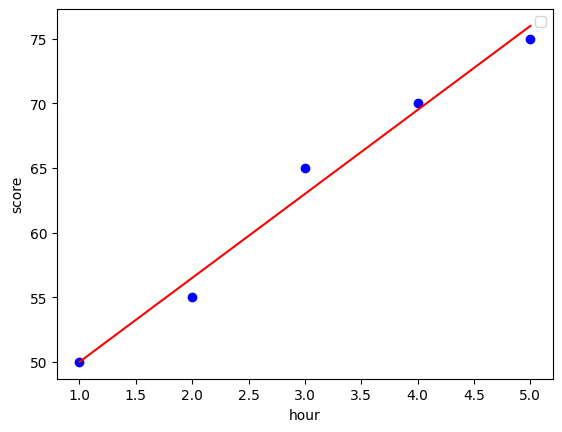

In [8]:
# 그래프
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.xlabel('hour')
plt.ylabel('score')
plt.legend()
plt.show()

In [9]:
# 새로운 데이터 예측

new_study_hours = np.array([6, 8, 10]).reshape(-1, 1)
predicted_scores = model.predict(new_study_hours)
print("새로운 공부 시간에 따른 예측 점수 : ", predicted_scores)

새로운 공부 시간에 따른 예측 점수 :  [ 82.5  95.5 108.5]


### 분류 모델

In [10]:
# 필요한 라이브러리 불러오기
from sklearn.datasets import load_breast_cancer # 유방암 데이터셋 로드
from sklearn.model_selection import train_test_split # 학습용/테스트용 데이터 분리
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report # 평가 지표

In [11]:
# 1. 데이터셋 로드 및 분리
data = load_breast_cancer() # 유방암 데이터셋 로드
X = data.data # 특징 데이터 (환자의 다양한 세포 정보)
y = data.target # 레이블 데이터 (0: 음성, 1: 양성)

In [12]:
# 학습용 데이터와 테스트용 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)
# test_size=0.2: 데이터의 20%는 테스트용으로 사용
# random_state=42: 실행할 때마다 동일한 데이터 분리 결과를 얻기 위해 설정

In [13]:
# 2. 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=10000) # 로지스틱 회귀 모델 생성 (최대반복 횟수 설정)
model.fit(X_train, y_train) # 학습 데이터로 모델 훈련

LogisticRegression(max_iter=10000)

In [14]:
# 3. 테스트 데이터 예측
y_pred = model.predict(X_test) # 테스트 데이터를 사용하여 결과 예측

In [15]:
# 4. 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred) # 정확도 계산
precision = precision_score(y_test, y_pred) # 정밀도 계산
recall = recall_score(y_test, y_pred) # 재현율 계산
f1 = f1_score(y_test, y_pred) # F1-Score 계산


In [16]:
# 5. 결과 출력
print("정확도(Accuracy):", accuracy) # 정확도 출력
print("정밀도(Precision):", precision) # 정밀도 출력
print("재현율(Recall):", recall) # 재현율 출력
print("F1-Score:", f1) # F1-Score 출력

정확도(Accuracy): 0.956140350877193
정밀도(Precision): 0.9459459459459459
재현율(Recall): 0.9859154929577465
F1-Score: 0.9655172413793104


In [17]:
# 혼동 행렬 출력
print("\n혼동 행렬 (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
# 혼동 행렬을 통해 TP, TN, FP, FN 값 확인


혼동 행렬 (Confusion Matrix):
 [[39  4]
 [ 1 70]]


In [18]:
# 분류 보고서 출력
print("\n분류 보고서 (Classification Report):\n",
classification_report(y_test, y_pred))
# Classification Report로 각 클래스에 대한 평가 지표 확인


분류 보고서 (Classification Report):
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### 사이킷런 기반 KNN 예제

In [19]:
# 1. 필요한 라이브러리 임포트
from sklearn.datasets import load_iris # Iris 데이터셋 로드
from sklearn.model_selection import train_test_split # 데이터 분리
from sklearn.neighbors import KNeighborsClassifier # KNN 알고리즘 사용
from sklearn.metrics import classification_report, accuracy_score #성능평가

In [20]:
# 2. 데이터 로드 및 확인
iris = load_iris() # Iris 데이터셋 로드
X = iris.data # 특성 데이터 (꽃잎/꽃받침의 길이와 너비)
y = iris.target # 레이블 데이터 (품종: Setosa, Versicolor, Virginica)

In [21]:
# 데이터 구조 확인
print(f"특성 데이터 샘플:\n{X[:5]}") # 처음 5개의 샘플 출력
print(f"레이블 데이터 샘플:\n{y[:5]}") # 처음 5개의 레이블 출력

특성 데이터 샘플:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
레이블 데이터 샘플:
[0 0 0 0 0]


In [22]:
# 3. 데이터 분리 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)


In [23]:
# 데이터 분리 결과 확인
print(f"훈련 데이터 크기: {X_train.shape}")
print(f"테스트 데이터 크기: {X_test.shape}")

훈련 데이터 크기: (120, 4)
테스트 데이터 크기: (30, 4)


In [24]:
# 4. KNN 모델 생성
k = 3 # 가장 가까운 이웃의 개수
knn = KNeighborsClassifier(n_neighbors=k) # KNN 분류기 생성

In [25]:
# 5. 모델 학습
knn.fit(X_train, y_train) # 훈련 데이터로 모델 학습

KNeighborsClassifier(n_neighbors=3)

In [26]:
# 6. 모델 평가
y_pred = knn.predict(X_test) # 테스트 데이터 예측
accuracy = accuracy_score(y_test, y_pred) # 정확도 계산
print(f"KNN 모델 정확도 (K={k}): {accuracy * 100:.2f}%") 

KNN 모델 정확도 (K=3): 100.00%


In [27]:
# 분류 성능 세부 보고서 출력
print("\n분류 보고서:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


분류 보고서:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
# 7. 새로운 데이터 예측
new_data = [[5.0, 3.5, 1.3, 0.3]] # 예측할 새로운 데이터 (꽃잎/꽃받침 크기)
prediction = knn.predict(new_data) # 예측
predicted_class = iris.target_names[prediction][0] # 예측된 품종 이름
print(f"\n새로운 데이터 {new_data}의 예측 결과: {predicted_class}")


새로운 데이터 [[5.0, 3.5, 1.3, 0.3]]의 예측 결과: setosa
